## Урок 6

### Взаимосвязь величин. Параметрические и непараметрические показатели корреляции.  Корреляционный анализ

__Корреляция__ — математический показатель, по которому можно судить, есть ли статистическая взаимосвязь между двумя и более случайными величинами.

__Коэффициент корреляции__ принимает значения из отрезка $[-1, 1]$.

Если коэффициент корреляции близок к $1$, то между величинами наблюдается прямая связь: увеличение одной величины сопровождается увеличением другой, а уменьшение одной — уменьшением другой.

Если же коэффициент корреляции близок к $-1$, то между величинами есть обратная корреляционная связь: увеличение одной величины сопровождается уменьшением другой и наоборот.

Коэффициент корреляции, равный $0$, говорит о том, что между величинами нет связи, то есть величины изменяются независимо друг от друга.

__Пример 1__

Посчитаем корреляцию роста с весом хоккеистов из рассмотренного ранее датасета. Это можно сделать с помощью метода `.corr`, который есть у объектов `DataFrame`.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
df = pd.read_csv('hockey_players.csv', encoding='cp1251', parse_dates=['birth'])
df = df.drop_duplicates(['name', 'birth'])
df.head()

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [5]:
df[['height', 'weight']].corr()

,height,weight
height,1.000000,0.693731
weight,0.693731,1.000000


В результате получается матрица корреляций. Мы видим, что корреляция роста и веса достаточно высока. Можно сделать вывод, что, как правило, чем выше рост хоккеиста, тем больше его вес.

Рассмотрим также корреляцию этих признаков с возрастом хоккеистов:

In [6]:
df[['height', 'weight', 'age']].corr()

,height,weight,age
height,1.000000,0.693731,-0.077862
weight,0.693731,1.000000,0.090665
age,-0.077862,0.090665,1.000000


In [7]:
df.describe()

,year,no,height,weight,age,cohort,bmi
count,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000,3294.000000
mean,2006.860959,28.520036,183.829387,87.464633,26.379341,1980.365513,25.865320
std,4.453502,22.776900,5.467629,7.043294,4.247066,6.802670,1.498745
min,2001.000000,1.000000,165.000000,65.000000,17.642710,1963.000000,19.460881
25%,2004.000000,12.000000,180.000000,83.000000,23.245038,1975.000000,24.901982
50%,2006.000000,23.000000,184.000000,87.000000,25.895962,1980.000000,25.811182
75%,2010.000000,37.000000,188.000000,92.000000,29.135524,1985.000000,26.861207
max,2016.000000,98.000000,205.000000,117.000000,41.505818,1998.000000,30.930438


Видно, что корреляция возраста достаточно низка как с ростом, так и с весом спортсменов.

### Взаимосвязь величин

Если две величины коррелируют, это может свидетельствовать о наличии _статистической связи_ между ними. Однако, говорить о ней мы можем только для величин из одной выборки. Корреляция величин в одной выборке не гарантирует того, что подобная связь встретится и в другой выборке и должна будет иметь такую же природу. 

Высокая корреляция между величинами не может быть интерпретирована как наличие причинно-следственной связи между ними.

Например, если рассмотреть данные о пожарах в городе, можно увидеть, что между материальными потерями, вызванными пожаром, и количеством пожарных, которые принимали участие в его тушении, есть сильная корреляция. При этом ложным будет вывод о том, что большое количество пожарных, присутствующих на пожаре, приводит к увеличению ущерба от него. 

Высокая корреляция двух величин может свидетельствовать о том, что у них есть _общая причина_, несмотря на то, что прямого взаимодействия между двумя коррелирующими величинами нет. 

Например, наступление зимы может быть причиной и  роста заболеваемости простудой, и повышения расходов на отопление. Эти две величины (число заболевших и расходы на отопление) имеют высокую корреляцию между собой, хотя они друг на друга напрямую не влияют.

Напротив, отсутствие корреляции между двумя величинами еще не говорит о том, что между показателями нет связи. 
Вполне возможно, что между признаками есть нелинейная зависимость, которую не может уловить используемый коэффициент корреляции.

__Пример 2__

Посчитаем корреляцию между ростом и BMI (_Body Mass Index_, т.е. _Индекс массы тела_). BMI равен весу, разделённому на квадрат роста:
$$BMI = \dfrac{weight}{height^2}.$$

In [9]:
df[['height', 'weight', 'bmi']].corr()

,height,weight,bmi
height,1.000000,0.693731,-0.067106
weight,0.693731,1.000000,0.670663
bmi,-0.067106,0.670663,1.000000


Как мы видим, коэффициент корреляции не улавливает зависимость между ростом и BMI. Это можно объяснить тем, что зависимость между ними не линейная, а квадратичная.

### Показатели корреляции

__Ковариация__ — мера линейной зависимости случайных величин. Её формула похожа на формулу дисперсии (_variance_). 

Формула ковариации случайных величин $X$ и $Y$:
$$\operatorname{cov}(X, Y) = M\left( (X - M(X)) (Y - M(Y)) \right).$$

Эту формулу можно раскрыть и упростить до
$$\operatorname{cov}(X, Y) = M(XY) - M(X) M(Y).$$

__Пример 3__

Посчитаем ковариацию между ростом и весом хоккеистов. Для начала сделаем это «в лоб» с помощью первой формулы.

In [10]:
X = df['height']
Y = df['weight']

MX = X.mean()
MY = Y.mean()

cov = ((X - MX) * (Y - MY)).mean()
cov

26.70753599210207

То же самое с помощью второй формулы:

In [11]:
cov = (X * Y).mean() - MX * MY
cov

26.70753599210002

Значения почти совпадают, хотя, не совсем. Это обусловлено тем, что приведённые выше формулы задают одну и ту же _характеристику случайной величины_, однако, в случае выборочного оценивания не совсем равны.

Наконец, посчитаем ковариацию с помощью готовой функции `numpy.cov`:

In [12]:
cov = np.cov(X, Y)
cov

array([[29.89496367, 26.71564639],
       [26.71564639, 49.60799566]])

In [14]:
X.var(), Y.var()

(29.894963668771, 49.60799565913306)

Эта функция возвращает не значение ковариации, а т.н. __матрицу ковариаций__. В ней по диагонали стоят вариации (т.е. дисперсии) каждой из выборок, а вне диагонали — попарные ковариации.

Отметим, что значение ковариации массивов `X` и `Y` теперь уже заметно отличаются от посчитанных выше. Это связано с тем, что, как и для дисперсии и среднего квадратического отклонения, оценка ковариации, следующая из формул выше, является смещённой. Несмещённую оценку можно посчитать с помощью первой формулы, если в знаменатель подставить не `n`, а `n - 1`. 

Вторая формула для вычисления несмещённой оценки ковариации так просто не модифицируется.

In [15]:
cov = ((X - MX) * (Y - MY)).sum() / (X.shape[0] - 1)
cov

26.715646388698516

Значение ковариации случайных величин сильно зависит от уровня разброса каждой из величин. Например, если в предыдущем примере домножить одну из выборок на какую-то константу, коэффициент ковариации также увеличится:

In [16]:
np.cov(X * 10, Y)

array([[2989.49636688,  267.15646389],
       [ 267.15646389,   49.60799566]])

Поэтому в качестве числовой характеристики зависимости случайных величин лучше использовать __коэффициент корреляции Пирсона__:
$$r_{XY} = \dfrac{\operatorname{cov}(X, Y)}{\sigma_X \cdot \sigma_Y}.$$

Здесь $\sigma_X$, $\sigma_Y$ — среднее квадратическое отклонение. Этот коэффициент и используется по умолчанию в методе `.corr`, который мы использовали ранее.

__Пример 4__

Посчитаем коэффициент корреляции для выборок из предыдущего примера. Для вычисления средних квадратических отклонений воспользуемся методом `.std`, который по умолчанию вычисляет несмещённую оценку.

In [17]:
corr = cov / (X.std() * Y.std())
corr

0.6937305679663021

Коэффициент корреляции Пирсона считается по умолчанию с помощью метода `.corr` объектов `pandas.DataFrame`, с помощью которого мы вычисляли корреляцию ранее:

In [18]:
df[['height', 'weight']].corr()

,height,weight
height,1.000000,0.693731
weight,0.693731,1.000000


Ту же самую матрицу корреляций можно получить с помощью функции `numpy.corrcoef`.

In [19]:
np.corrcoef(X, Y)

array([[1.        , 0.69373057],
       [0.69373057, 1.        ]])

Коэффициент корреляции Пирсона хорошо работает, если распределение случайных величин _близко к нормальному_ и если требуется измерить именно уровень _линейной_ зависимости.

В других случаях используются непараметрические показатели, такие как __ранговые коэффициенты__ корреляции __Кендалла__ и __Спирмена__.

In [20]:
help(pd.DataFrame.corr)

Help on function corr in module pandas.core.frame:

corr(self, method='pearson', min_periods=1)
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float
            .. versionadded:: 0.24.0
    
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for pearson
        and spearman correlation
    
    Returns
    -------
    y : DataFrame
    
    See Also
    --------
    DataFrame.corrwith
    Series.corr
    
    Examples
    --------
    >>> histogram_intersection = lambda a, b: np.minimum(a, b
    ... ).sum().round(decimals=1)
    

### Корреляционный анализ

__Корреляционный анализ__ — метод обработки статистических данных, с помощью которого измеряется теснота связи между двумя или более переменными.

Плюсы:
* Прост в интерпретации

Минусы:
* Только для нормально распределённых величин
* Опасность неверно интерпретировать взаимосвязь величин
* Некоторые коэффициенты находят лишь линейную взаимосвязь

__Пример 5__

Ранее в примере 2 мы вычисляли корреляцию между ростом, весом и коэффициентом BMI хоккеистов:

In [21]:
df[['height', 'weight', 'bmi']].corr()

,height,weight,bmi
height,1.000000,0.693731,-0.067106
weight,0.693731,1.000000,0.670663
bmi,-0.067106,0.670663,1.000000


Тогда мы отметили, что низкий коэффициент корреляции между ростом и BMI можно объяснить тем, что между величинами имеется нелинейная взаимосвязь. 

Слова «можно объяснить» здесь использованы не зря: если распределения рассматриваемых случайных величин не являются нормальными, то доверять результатам корреляционного анализа вообще можно лишь с определённой погрешностью.

Проверка, является ли распределение нормальным, занимает отдельное место в математической статистике. Здесь мы лишь построим гистограммы распределений соответствующих величин, чтобы посмотреть, насколько они «похожи» на нормальные.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a3ded42b0>,
      dtype=object)

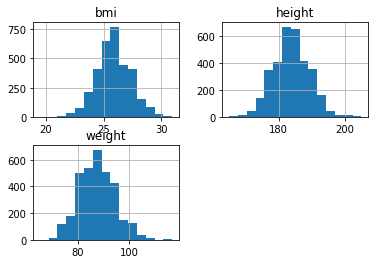

In [22]:
df[['height', 'weight', 'bmi']].hist(bins=15)

__Квартет Энскомба__

__Квартет Энскомба__ — популярный в области анализа данных пример четырёх наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики.

In [23]:
anscombe_dataset = pd.read_csv('anscombe_dataset.csv', index_col='id')

anscombe_dataset

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


Убедимся, что статистические характеристики действительно совпадают. Среднее:

In [24]:
anscombe_dataset.mean()

x1    9.000000
y1    7.500909
x2    9.000000
y2    7.500909
x3    9.000000
y3    7.500000
x4    9.000000
y4    7.500909
dtype: float64

Дисперсия:

In [25]:
anscombe_dataset.var()

x1    11.000000
y1     4.127269
x2    11.000000
y2     4.127629
x3    11.000000
y3     4.122620
x4    11.000000
y4     4.123249
dtype: float64

Коэффициент корреляции:

In [26]:
anscombe_dataset.corr()

,x1,y1,x2,y2,x3,y3,x4,y4
x1,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
y1,0.816421,1.000000,0.816421,0.750005,0.816421,0.468717,-0.529093,-0.489116
x2,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
y2,0.816237,0.750005,0.816237,1.000000,0.816237,0.587919,-0.718437,-0.478095
x3,1.000000,0.816421,1.000000,0.816237,1.000000,0.816287,-0.500000,-0.314047
y3,0.816287,0.468717,0.816287,0.587919,0.816287,1.000000,-0.344661,-0.155472
x4,-0.500000,-0.529093,-0.500000,-0.718437,-0.500000,-0.344661,1.000000,0.816521
y4,-0.314047,-0.489116,-0.314047,-0.478095,-0.314047,-0.155472,0.816521,1.000000


Наконец, посмотрим, как выглядят эти данные. Поскольку данные двумерные, каждый датасет можно изобразить на плоскости (т.н. `scatter plot`):

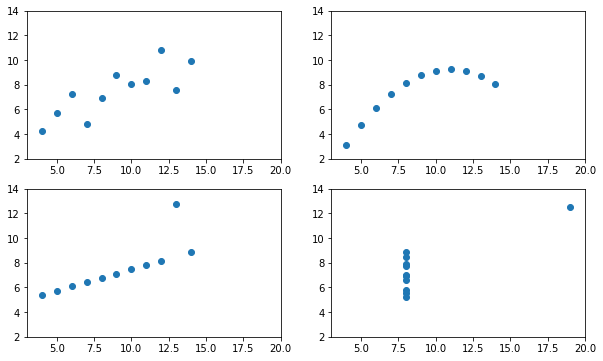

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 6)

ax1, ax2, ax3, ax4 = axes.flatten()

for i, ax in enumerate(axes.flatten()):
    x_key = f'x{i + 1}'
    y_key = f'y{i + 1}'
    
    ax.scatter(anscombe_dataset[x_key], anscombe_dataset[y_key])
    
    ax.set_xlim(3, 20)
    ax.set_ylim(2, 14)

## Упражнения

__Задача 1__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
1. Найдите ковариацию этих двух величин: сначала без использования специальных функций, а затем с помощью функции `numpy.cov`. Полученные значения должны быть равны.
2. Найдите коэффициент корреляции Пирсона: с помощью ковариации и средних квадратических отклонений двух признаков, а затем с помощью специальных функций из библиотек `numpy` и `pandas`.

__Задача 2__

Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:
```
131, 125, 115, 122, 131, 115, 107, 99, 125, 111
```
Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

__Задача 3__

Известно, что рост футболистов в сборной распределён нормально с известной дисперсией 25. На выборке объёма 27 выборочное среднее составило 174.2. Найдите доверительный интервал для математического ожидания с надёжностью 0.95.

__Задача 4__

Выберите тему для проектной работы по курсу Теории вероятностей и математической статистики и напишите ее в комментарии к Практическому заданию.

### Проектная работа

* Для себя (для портфолио). В последствии можно улучшать, добавлять что-то.
* Темы:
    1. Описательная статистика (статистические характеристики, графики, взаимосвязь величин, дисперсионный и факторный анализ)
    2. Предиктивная аналитика (линейная регрессия, логистическая регрессия)
* Можно взять данные с сайта `imdb.com`. В готовом виде их можно найти, например, на `kaggle` или в `bigquery`.
* Сроки: 1 неделя после 8 занятия.
* Начинать можно и раньше, но необходимо сначала согласовать со мной тему.

Примеры тем:
* Проверить гипотезу: комедийные фильмы, снятые до 1990 года, в среднем имеют более высокую оценку, чем комедийные фильмы снятые позже.
* Статистическое сопоставление цены биткоина с курсами фиатных активов (USD,EUR,RUR), ценами на нефть, драг металлы или с ценами других криптовалют по отношению к биткоину. (Это не по `imdb`, но допускается, если хотите.)
* Исследование статистической связи между бюджетом фильма и полученной прибылью.

Можно поставить себе широкий круг задач, а затем уже в процессе понять, что получается, а что — нет. Пример:
* Анализ по Странам по данным `imdb.com`: По странам расчитать основные статистические показатели: Мода, медиана, квартили, дисперсию. Проверить, работает ли нормальное распределение и Паретто. Проверить есть ли зависимость бюджетов, рейтингов, жанров от страны выпуска фильмов. Посмотреть поведение стран во времени. Сделать прогноз на 2020 год: какие страны с какой вероятностью выпустят определенное количество фильмов с определенным бюджетом определенного жанра.

Это просто темы для референса, рекоммендуется всё же не брать прямо такие, а придумать что-нибудь своё. Но в таком духе.

[Пример готового проекта](https://nbviewer.jupyter.org/github/Serebryanskiy/Matstat/blob/master/Project.ipynb) (задача-максимум).

Пожелание к оформлению: подробное изложение. Проект (ключевые для вас моменты касательно данных, последовательность изложения и пр.) должен быть понятен человеку, который эти данные никогда раньше не видел.